In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


The following data sets are available
meta data of type .json
phone data of type .csv
The meta data holds information from sellers point of view and the phone data holds user information. We begin by unzipping the meta data file and extracting its content to a list.





In [ ]:
 # Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/Web and social media analytics/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/Capstone Project/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [ ]:
#Reading the .csv file of the phone data into a dataframe
df_phonedata = pd.read_csv('/content/drive/MyDrive/Web and social media analytics/Cell_Phones_and_Accessories_5.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


Data pre-processing


In [ ]:
#Null Values Extraction

100*df_phonedata.isna().sum()/len(df_phonedata)

overall              0.000000
verified             0.000000
reviewerID           0.000000
asin                 0.000000
style               46.364662
reviewerName         0.013824
reviewText           0.068059
summary              0.046525
unixReviewTime       0.000000
vote                91.844117
image               97.597828
review_sentiment     0.000000
dtype: float64

In [ ]:
df_phonedata.drop(['vote','image','style'],inplace=True,axis=1)

In [ ]:
#Null Values Extraction

100*df_phonedata.isna().sum()/len(df_phonedata)

overall             0.000000
verified            0.000000
reviewerID          0.000000
asin                0.000000
reviewerName        0.013824
reviewText          0.068059
summary             0.046525
unixReviewTime      0.000000
review_sentiment    0.000000
dtype: float64

In [ ]:
df_phonedata = df_phonedata.dropna(subset=['reviewText','reviewerName','summary'])


In [ ]:
100*df_phonedata.isna().sum()/len(df_phonedata)

overall             0.0
verified            0.0
reviewerID          0.0
asin                0.0
reviewerName        0.0
reviewText          0.0
summary             0.0
unixReviewTime      0.0
review_sentiment    0.0
dtype: float64

In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127041 entries, 0 to 1128436
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1127041 non-null  float64
 1   verified          1127041 non-null  bool   
 2   reviewerID        1127041 non-null  object 
 3   asin              1127041 non-null  object 
 4   reviewerName      1127041 non-null  object 
 5   reviewText        1127041 non-null  object 
 6   summary           1127041 non-null  object 
 7   unixReviewTime    1127041 non-null  int64  
 8   review_sentiment  1127041 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 78.5+ MB


In [ ]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [ ]:
df_phonedata.head(10)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NEGATIVE,2014-02-07
3,2.0,True,A1M117A53LEI8,7508492919,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,POSITIVE,2014-02-03
4,4.0,True,A272DUT8M88ZS8,7508492919,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,POSITIVE,2014-02-02
5,2.0,True,A1DW2L6XCC5TJS,7508492919,Amazon Customer,The product looked exactly like the picture an...,Not so happy,1390780800,NEGATIVE,2014-01-26
6,3.0,True,AQC61R4UST7UH,7508492919,DaMara Estep,I FINALLY got my case today. It took forever t...,It's cute!,1390435200,POSITIVE,2014-01-22
7,5.0,True,A31OVFL91BCKXG,7508492919,Ashley Nicole Miller,It is a very cute case. None of the jewels hav...,Cute case,1389916800,POSITIVE,2014-01-16
8,1.0,True,A1K0VLK6O5Z22M,7508492919,BeeLove21,DO NOT BUY! this item is seriously cheap as he...,WORST ITEM!,1388102400,POSITIVE,2013-12-26
9,4.0,True,A1K3BWU73YB44P,7508492919,Mrs. Ochoa,I really love this case... you have to keep yo...,Pretty Cute!,1387152000,POSITIVE,2013-12-15


In [ ]:
df_phonedata.drop(['reviewerName','unixReviewTime'],inplace=True,axis=1)

In [ ]:
df_phonedata.head(10)

,overall,verified,reviewerID,asin,reviewText,summary,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,When you don't want to spend a whole lot of ca...,1,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,"so the case came on time, i love the design. I...",Its okay,NEGATIVE,2014-02-07
3,2.0,True,A1M117A53LEI8,7508492919,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,POSITIVE,2014-02-03
4,4.0,True,A272DUT8M88ZS8,7508492919,"I liked it because it was cute, but the studs ...",Cute!,POSITIVE,2014-02-02
5,2.0,True,A1DW2L6XCC5TJS,7508492919,The product looked exactly like the picture an...,Not so happy,NEGATIVE,2014-01-26
6,3.0,True,AQC61R4UST7UH,7508492919,I FINALLY got my case today. It took forever t...,It's cute!,POSITIVE,2014-01-22
7,5.0,True,A31OVFL91BCKXG,7508492919,It is a very cute case. None of the jewels hav...,Cute case,POSITIVE,2014-01-16
8,1.0,True,A1K0VLK6O5Z22M,7508492919,DO NOT BUY! this item is seriously cheap as he...,WORST ITEM!,POSITIVE,2013-12-26
9,4.0,True,A1K3BWU73YB44P,7508492919,I really love this case... you have to keep yo...,Pretty Cute!,POSITIVE,2013-12-15


Meta Data Pre-Processing

In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      590071 non-null  object
 1   tech1         590071 non-null  object
 2   description   590071 non-null  object
 3   fit           590071 non-null  object
 4   title         590071 non-null  object
 5   also_buy      590071 non-null  object
 6   image         590071 non-null  object
 7   tech2         590071 non-null  object
 8   brand         590071 non-null  object
 9   feature       590071 non-null  object
 10  rank          590071 non-null  object
 11  also_view     590071 non-null  object
 12  details       590071 non-null  object
 13  main_cat      590071 non-null  object
 14  similar_item  590071 non-null  object
 15  date          590071 non-null  object
 16  price         590071 non-null  object
 17  asin          590071 non-null  object
dtypes: object(18)
memory usa

In [ ]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [ ]:
df_meta.shape

(590071, 18)

In [ ]:
(100*df_meta.isnull().sum()/len(df_meta)).round(2)

category        0.0
tech1           0.0
description     0.0
fit             0.0
title           0.0
also_buy        0.0
image           0.0
tech2           0.0
brand           0.0
feature         0.0
rank            0.0
also_view       0.0
details         0.0
main_cat        0.0
similar_item    0.0
date            0.0
price           0.0
asin            0.0
dtype: float64

In [ ]:
df_meta['price'] = df_meta['price'].str.replace('$','')
df_meta['price'] = df_meta['price'].str.replace(',','')

In [ ]:
df_meta['price']=pd.to_numeric(df_meta['price'],errors='coerce')

In [ ]:
(100*df_meta.isnull().sum()/len(df_meta)).round(2)

category         0.00
tech1            0.00
description      0.00
fit              0.00
title            0.00
also_buy         0.00
image            0.00
tech2            0.00
brand            0.00
feature          0.00
rank             0.00
also_view        0.00
details          0.00
main_cat         0.00
similar_item     0.00
date             0.00
price           78.88
asin             0.00
dtype: float64

In [ ]:
avg_price=df_meta[~df_meta['price'].isna()]
avg_price=avg_price.groupby(['brand'])['price'].mean()

In [ ]:
avg_price.head(5)

brand
                       18.090729
#1 Consumers Choice     4.770000
%3FInnove              11.990000
*shelley                9.990000
0                      39.990000
Name: price, dtype: float64

In [ ]:
meta_data_dict=avg_price.to_dict()
print(meta_data_dict)

{'': 18.090728929384863, '#1 Consumers Choice': 4.77, '%3FInnove': 11.99, '*shelley': 9.99, '0': 39.99, '01 Audio': 6.04, '100% Brand New': 2.25, '100Silver': 10.05, '123 Go': 10.99, '13712': 27.28166666666667, '158': 2.95, '15879': 29.99, '1800Battery': 4.99, '1byone': 153.445, '2 Frogs Straps, Keychains': 3.99, '2 Moda': 7.49, '2 Naissance': 6.99, '2World': 39.99, '2phonesin1': 8.9, '2win2buy': 9.07142857142857, '3': 37.0, '32nd': 11.99, '32ndShop': 14.030000000000006, '360fly': 4.15, '365 In Love': 13.323333333333336, '365 Printing': 19.50020408163266, '365 Printing Inc': 9.99, '3C-Aone': 20.606875000000002, '3C-LIFE': 18.316666666666666, '3CLeader': 87.49333333333334, '3Cworld': 7.95, '3D Belt': 44.99666666666667, '3Gen': 39.95, '3M': 16.948235294117648, '3M Personal Protective Equipment': 23.865, '3MOOB75': 24.95, '3SIXT': 5.99, '3c wholesaler': 6.49, '3dRose': 20.06, '407Case': 10.963333333333331, '44LLC': 9.9, '4C': 0.99, '4KIDS': 19.99, '4SGM': 6.73, '4YOU&ME': 9.99, '4pmla': 1

In [ ]:
# Filling up the null values
def price_null_val(x,d=meta_data_dict):

    if x in d.keys():
    
        return d[x]
     

df_temp=df_meta[df_meta['price'].isna()]
print(df_temp.info())
df_meta=df_meta[~df_meta['price'].isna()]
print(df_meta.info())
print(df_temp.head())
df_temp['price']=df_temp['brand'].apply(lambda x: price_null_val(x))
print(df_temp.info())

# Merging datasets
df_meta=pd.concat([df_meta,df_temp],ignore_index=True)
print(df_meta.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465476 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      465476 non-null  object 
 1   tech1         465476 non-null  object 
 2   description   465476 non-null  object 
 3   fit           465476 non-null  object 
 4   title         465476 non-null  object 
 5   also_buy      465476 non-null  object 
 6   image         465476 non-null  object 
 7   tech2         465476 non-null  object 
 8   brand         465476 non-null  object 
 9   feature       465476 non-null  object 
 10  rank          465476 non-null  object 
 11  also_view     465476 non-null  object 
 12  details       465476 non-null  object 
 13  main_cat      465476 non-null  object 
 14  similar_item  465476 non-null  object 
 15  date          465476 non-null  object 
 16  price         0 non-null       float64
 17  asin          465476 non-null  object 
dtypes: f

In [ ]:
(100*df_meta.isnull().sum()/len(df_meta)).round(2)

category         0.00
tech1            0.00
description      0.00
fit              0.00
title            0.00
also_buy         0.00
image            0.00
tech2            0.00
brand            0.00
feature          0.00
rank             0.00
also_view        0.00
details          0.00
main_cat         0.00
similar_item     0.00
date             0.00
price           26.22
asin             0.00
dtype: float64

In [ ]:
# Extracting category='Cell Phones'
def categ_extract(x):
    x=list(x)
    if len(x)>=2:
        return ''.join(x[1])
    else:
        return ''.join(x)
df_meta['category'] = df_meta['category'].apply(lambda x: categ_extract(x))
# df_meta = df_meta[df_meta['category'] == "Cell Phones"]
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,Accessories,,[],,Andersens Fairy Stories (Chinese Edition),[],[],,Cui Zhong Lei,[],"7,676,708 in Books (",[],"{'Paperback:': '199 pages', 'Publisher:': 'Har...",Books,,,3.99,7807538503
1,"Cases, Holsters & Sleeves",,[Description:\nProtect your phone with style t...,,Black And Pink Leopard Rubberized Snap on Desi...,[],[https://images-na.ssl-images-amazon.com/image...,,Generic,[],"[>#440,155 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,5.95,7887421268
2,Accessories,,[],,Samsung New Version ECA-U11CBE Official OEM Ca...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[Safely charge your phone from your car using ...,"[>#337,417 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,14.99,8288862993
3,,,"[Made of high quality materials, the screen pr...",,"[3-Pack] Galaxy S8 Screen Protector, Fitquipme...","[B06XP6KZKC, B07M5MRQF3, B00Z7TCISG, B06XCT3DB...",[https://images-na.ssl-images-amazon.com/image...,,Fitquipment,"[Protect your device screen, perfect cut and f...",[],"[B07JM99CJG, B07KKBZRRW, B07L6WDSTX, B00ODCWP5...",{},Cell Phones & Accessories,,,7.99,8460793044
4,,,"[Made of high quality materials, the screen pr...",,"[3-Pack] Galaxy S8 Screen Protector, Fitquipme...","[B06XP6KZKC, B07M5MRQF3, B00Z7TCISG, B06XCT3DB...",[https://images-na.ssl-images-amazon.com/image...,,Fitquipment,"[Protect your device screen, perfect cut and f...",[],"[B07JM99CJG, B07KKBZRRW, B07L6WDSTX, B00ODCWP5...",{},Cell Phones & Accessories,,,7.99,857366018X


In [ ]:
df_meta=df_meta[df_meta['category']=='Cell Phones']


In [ ]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
74,Cell Phones,,"[Sprint PCS Dual-Band / Tri-Mode Phone, Compat...",,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,[],[],,Nokia,[],"[>#2,793,203 in Cell Phones & Accessories (See...","[B075FL4H89, B000FJ1XWA, B07BTG3T3Y]",{},Cell Phones & Accessories,,,27.57,B0000SX2UC
109,Cell Phones,,"[Compatible with Sprint cell phone service, th...",,PCS Vision Picture Phone Nokia PM-6225 (Sprint),[],[],,Nokia,[],"[>#4,250,972 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,53.96,B00023DFSO
176,Cell Phones,,"[Sprint PCS Dual-Band / Tri-Mode Phone, Compat...",,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,[],[],,Nokia,[],"[>#2,793,203 in Cell Phones & Accessories (See...","[B075FL4H89, B000FJ1XWA, B07BTG3T3Y]",{},Cell Phones & Accessories,,,27.57,B0000SX2UC
211,Cell Phones,,"[Compatible with Sprint cell phone service, th...",,PCS Vision Picture Phone Nokia PM-6225 (Sprint),[],[],,Nokia,[],"[>#4,250,972 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,53.96,B00023DFSO
263,Cell Phones,,"[If you're in your car a lot, this is the phon...",,LG VX4500 Phone (Verizon Wireless),[],[https://images-na.ssl-images-amazon.com/image...,,LG,[],"[>#877,179 in Cell Phones & Accessories (See T...","[B0049IM7O6, B01DRV2BBY, B000G2TLIO, B00EN6D8H...",{},Cell Phones & Accessories,,,18.99,B00065982U


Exploratory Data Analysis

In [ ]:
# Check the number of rows and columns in the dataframe
df_phonedata.shape

(1127041, 8)

In [ ]:
# Check the column-wise info of the dataframe
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127041 entries, 0 to 1128436
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1127041 non-null  float64
 1   verified          1127041 non-null  bool   
 2   reviewerID        1127041 non-null  object 
 3   asin              1127041 non-null  object 
 4   reviewText        1127041 non-null  object 
 5   summary           1127041 non-null  object 
 6   review_sentiment  1127041 non-null  object 
 7   Date&Time         1127041 non-null  object 
dtypes: bool(1), float64(1), object(6)
memory usage: 69.9+ MB


In [ ]:
# Checking for missing values
(100*df_phonedata.isnull().sum()/len(df_phonedata)).round(2)

overall             0.0
verified            0.0
reviewerID          0.0
asin                0.0
reviewText          0.0
summary             0.0
review_sentiment    0.0
Date&Time           0.0
dtype: float64

In [ ]:
# Let's check the dataframe once again
df_phonedata.head(5)


,overall,verified,reviewerID,asin,reviewText,summary,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,When you don't want to spend a whole lot of ca...,1,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,"so the case came on time, i love the design. I...",Its okay,NEGATIVE,2014-02-07
3,2.0,True,A1M117A53LEI8,7508492919,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,POSITIVE,2014-02-03
4,4.0,True,A272DUT8M88ZS8,7508492919,"I liked it because it was cute, but the studs ...",Cute!,POSITIVE,2014-02-02


In [ ]:
# As we can see there duplicate values in the asin and reviewer id column so lets create a new column which is combination of them
df_phonedata['reviewerid_asin']=df_phonedata['reviewerID']+'_'+df_phonedata['asin']
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,summary,review_sentiment,Date&Time,reviewerid_asin
0,5.0,True,A24E3SXTC62LJI,7508492919,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03,A24E3SXTC62LJI_7508492919
1,5.0,True,A269FLZCB4GIPV,7508492919,When you don't want to spend a whole lot of ca...,1,POSITIVE,2014-02-11,A269FLZCB4GIPV_7508492919
2,3.0,True,AB6CHQWHZW4TV,7508492919,"so the case came on time, i love the design. I...",Its okay,NEGATIVE,2014-02-07,AB6CHQWHZW4TV_7508492919
3,2.0,True,A1M117A53LEI8,7508492919,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,POSITIVE,2014-02-03,A1M117A53LEI8_7508492919
4,4.0,True,A272DUT8M88ZS8,7508492919,"I liked it because it was cute, but the studs ...",Cute!,POSITIVE,2014-02-02,A272DUT8M88ZS8_7508492919


In [ ]:
# Let's check for duplicate values in reviewerid_asin column
df_phonedata['reviewerid_asin'].duplicated().value_counts()

False    1119382
True        7659
Name: reviewerid_asin, dtype: int64

In [ ]:
#Let's remove the duplicated rows having same reviewerid_asin column
df_phonedata=df_phonedata[~(df_phonedata['reviewerid_asin'].duplicated())]

In [ ]:
# Lets check for duplicate values now in reviewerid_asin column
df_phonedata['reviewerid_asin'].duplicated().value_counts()

False    1119382
Name: reviewerid_asin, dtype: int64

In [ ]:
df_phonedata['verified'].value_counts()

True     980180
False    139202
Name: verified, dtype: int64

In [ ]:
# Let's keep reviews given by verified users
df_phonedata=df_phonedata[~(df_phonedata['verified']==False)]

In [ ]:
df_phonedata['verified'].value_counts()

True    980180
Name: verified, dtype: int64

In [ ]:
# Lets remove the missing values from the review text and summary column
df_phonedata=df_phonedata[(df_phonedata['reviewText'].isna()==False) & (df_phonedata['summary'].isna()==False)]

In [ ]:
# Now let's check the missing value in the review text and summary column
(100*df_phonedata.isnull().sum()/len(df_phonedata)).round(2)



overall             0.0
verified            0.0
reviewerID          0.0
asin                0.0
reviewText          0.0
summary             0.0
review_sentiment    0.0
Date&Time           0.0
reviewerid_asin     0.0
dtype: float64

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,summary,review_sentiment,Date&Time,reviewerid_asin
0,5.0,True,A24E3SXTC62LJI,7508492919,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,POSITIVE,2014-08-03,A24E3SXTC62LJI_7508492919
1,5.0,True,A269FLZCB4GIPV,7508492919,When you don't want to spend a whole lot of ca...,1,POSITIVE,2014-02-11,A269FLZCB4GIPV_7508492919
2,3.0,True,AB6CHQWHZW4TV,7508492919,"so the case came on time, i love the design. I...",Its okay,NEGATIVE,2014-02-07,AB6CHQWHZW4TV_7508492919
3,2.0,True,A1M117A53LEI8,7508492919,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,POSITIVE,2014-02-03,A1M117A53LEI8_7508492919
4,4.0,True,A272DUT8M88ZS8,7508492919,"I liked it because it was cute, but the studs ...",Cute!,POSITIVE,2014-02-02,A272DUT8M88ZS8_7508492919


In [ ]:
# let's look at the shape of the dataframe
df_phonedata.shape

(980180, 9)

In [ ]:
# Lets make a new dataframe which has some specific columns which will help us in building good model
df_phonedata_2 = df_phonedata[['review_sentiment','reviewText','summary']]

In [ ]:
# Let's check the new dataframe build for text analytics
df_phonedata_2.head(5)

,review_sentiment,reviewText,summary
0,POSITIVE,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it
1,POSITIVE,When you don't want to spend a whole lot of ca...,1
2,NEGATIVE,"so the case came on time, i love the design. I...",Its okay
3,POSITIVE,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE
4,POSITIVE,"I liked it because it was cute, but the studs ...",Cute!


In [ ]:
# Let's check the new dataframe build for text analytics
df_phonedata_2.head(5)

,review_sentiment,reviewText,summary
0,POSITIVE,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it
1,POSITIVE,When you don't want to spend a whole lot of ca...,1
2,NEGATIVE,"so the case came on time, i love the design. I...",Its okay
3,POSITIVE,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE
4,POSITIVE,"I liked it because it was cute, but the studs ...",Cute!


In [ ]:
df_phonedata=pd.merge(df_phonedata,df_meta,on='asin',how='inner')

In [ ]:
print(df_phonedata.brand.value_counts())
# To ascertain top brands only
df_phonedata = df_phonedata[df_phonedata.groupby('brand').brand.transform('count')>1000].copy()
print(df_phonedata.brand.value_counts())

Samsung          13906
BLU               8448
LG                5456
Motorola          4003
Nokia             3902
                 ...  
Coolpad              2
RugGear              2
TracFone             2
Palm Treo 650        2
Acer                 1
Name: brand, Length: 147, dtype: int64
Samsung       13906
BLU            8448
LG             5456
Motorola       4003
Nokia          3902
Apple          3799
BlackBerry     3185
HTC            1992
Sony           1302
Huawei         1186
Name: brand, dtype: int64


In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47179 entries, 0 to 54405
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           47179 non-null  float64
 1   verified          47179 non-null  bool   
 2   reviewerID        47179 non-null  object 
 3   asin              47179 non-null  object 
 4   reviewText        47179 non-null  object 
 5   summary           47179 non-null  object 
 6   review_sentiment  47179 non-null  object 
 7   Date&Time         47179 non-null  object 
 8   reviewerid_asin   47179 non-null  object 
 9   category          47179 non-null  object 
 10  tech1             47179 non-null  object 
 11  description       47179 non-null  object 
 12  fit               47179 non-null  object 
 13  title             47179 non-null  object 
 14  also_buy          47179 non-null  object 
 15  image             47179 non-null  object 
 16  tech2             47179 non-null  object

In [103]:
df_phonedata.to_csv('Sentiment.csv',index=False)

Text Analytics

In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/Web and social media analytics/stop_words_long.txt')]

In [ ]:
# Convertinhg all the review text column into lower case
df_phonedata['reviewText']=df_phonedata['reviewText'].str.lower()
df_phonedata['summary']=df_phonedata['summary'].str.lower()
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,summary,review_sentiment,Date&Time,reviewerid_asin,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,"..and i'm from europe, where the phones and ne...",the best phone i've ever owned,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
1,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,"..and i'm from europe, where the phones and ne...",the best phone i've ever owned,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
2,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,good phone with some functions missing,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
3,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,good phone with some functions missing,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
8,4.0,True,AN9Q4QY93VLLF,B0002NM98Q,"overall, i really like the phone but i have to...",good mix of what everyone else writes,POSITIVE,2004-10-26,AN9Q4QY93VLLF_B0002NM98Q,Cell Phones,,[The tri-band Motorola V600 cell phone feature...,,Motorola V600 Phone (T-Mobile),[],[https://images-na.ssl-images-amazon.com/image...,,Motorola,"[Colorful customizable external display, VGA c...",[],[],{},Cell Phones & Accessories,,,28.536150


In [ ]:
# Importing the word tokenise method from nltk library
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
import re
import string
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def preprocess(x):
  x=str(x)
  x = x.lower()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  x = re.sub('<.*?>+', '', x)
  x = re.sub(r'\n', '', x)
  return x
df_phonedata['reviewText']=df_phonedata['reviewText'].apply(lambda document: preprocess(document))

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,summary,review_sentiment,Date&Time,reviewerid_asin,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,the best phone i've ever owned,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
1,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,the best phone i've ever owned,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
2,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,good phone with some functions missing,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
3,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,good phone with some functions missing,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
8,4.0,True,AN9Q4QY93VLLF,B0002NM98Q,overall i really like the phone but i have to ...,good mix of what everyone else writes,POSITIVE,2004-10-26,AN9Q4QY93VLLF_B0002NM98Q,Cell Phones,,[The tri-band Motorola V600 cell phone feature...,,Motorola V600 Phone (T-Mobile),[],[https://images-na.ssl-images-amazon.com/image...,,Motorola,"[Colorful customizable external display, VGA c...",[],[],{},Cell Phones & Accessories,,,28.536150


In [ ]:
df_phonedata['summary']=df_phonedata['summary'].apply(lambda document: preprocess(document))

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,summary,review_sentiment,Date&Time,reviewerid_asin,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,the best phone i ever owned,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
1,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,the best phone i ever owned,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
2,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,good phone with some functions missing,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
3,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,good phone with some functions missing,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
8,4.0,True,AN9Q4QY93VLLF,B0002NM98Q,overall i really like the phone but i have to ...,good mix of what everyone else writes,POSITIVE,2004-10-26,AN9Q4QY93VLLF_B0002NM98Q,Cell Phones,,[The tri-band Motorola V600 cell phone feature...,,Motorola V600 Phone (T-Mobile),[],[https://images-na.ssl-images-amazon.com/image...,,Motorola,"[Colorful customizable external display, VGA c...",[],[],{},Cell Phones & Accessories,,,28.536150


In [ ]:
# Lets look for the missing values
df_phonedata.isna().sum()

overall             0
verified            0
reviewerID          0
asin                0
reviewText          0
summary             0
review_sentiment    0
Date&Time           0
reviewerid_asin     0
category            0
tech1               0
description         0
fit                 0
title               0
also_buy            0
image               0
tech2               0
brand               0
feature             0
rank                0
also_view           0
details             0
main_cat            0
similar_item        0
date                0
price               0
dtype: int64

In [ ]:
# Lets drop the summary coulumn as it is not that helpful
df_phonedata.drop('summary',axis=1,inplace=True)

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,review_sentiment,Date&Time,reviewerid_asin,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
1,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
2,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
3,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
8,4.0,True,AN9Q4QY93VLLF,B0002NM98Q,overall i really like the phone but i have to ...,POSITIVE,2004-10-26,AN9Q4QY93VLLF_B0002NM98Q,Cell Phones,,[The tri-band Motorola V600 cell phone feature...,,Motorola V600 Phone (T-Mobile),[],[https://images-na.ssl-images-amazon.com/image...,,Motorola,"[Colorful customizable external display, VGA c...",[],[],{},Cell Phones & Accessories,,,28.536150


In [ ]:
# importing the porter stemmenr library for stemming
from nltk.stem.porter import PorterStemmer

In [ ]:
# Intialising the instance of the porter stemmer
stemmer = PorterStemmer()

In [ ]:
df_phonedata['stemmed_review_text']=df_phonedata_2['reviewText'].apply(lambda token: stemmer.stem(token))

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,review_sentiment,Date&Time,reviewerid_asin,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,stemmed_review_text
0,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,looks even better in person. be careful to not...
1,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,when you don't want to spend a whole lot of ca...
2,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,"so the case came on time, i love the design. i..."
3,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,don't care for it. gave it as a gift and they...
8,4.0,True,AN9Q4QY93VLLF,B0002NM98Q,overall i really like the phone but i have to ...,POSITIVE,2004-10-26,AN9Q4QY93VLLF_B0002NM98Q,Cell Phones,,[The tri-band Motorola V600 cell phone feature...,,Motorola V600 Phone (T-Mobile),[],[https://images-na.ssl-images-amazon.com/image...,,Motorola,"[Colorful customizable external display, VGA c...",[],[],{},Cell Phones & Accessories,,,28.536150,do not buy! this item is seriously cheap as he...


In [ ]:
# As we can see there is hardly any difference between reviewText and stemmed_review_text column so lets drop stemmed_review_text column
df_phonedata.drop('stemmed_review_text',axis=1,inplace=True)

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,review_sentiment,Date&Time,reviewerid_asin,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
1,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
2,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
3,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194
8,4.0,True,AN9Q4QY93VLLF,B0002NM98Q,overall i really like the phone but i have to ...,POSITIVE,2004-10-26,AN9Q4QY93VLLF_B0002NM98Q,Cell Phones,,[The tri-band Motorola V600 cell phone feature...,,Motorola V600 Phone (T-Mobile),[],[https://images-na.ssl-images-amazon.com/image...,,Motorola,"[Colorful customizable external display, VGA c...",[],[],{},Cell Phones & Accessories,,,28.536150


In [ ]:
# importing the porter stemmenr library for stemming
from nltk.stem.porter import PorterStemmer

In [ ]:
# Intialising the instance of the porter stemmer
stemmer = PorterStemmer()

In [ ]:
df_phonedata['stemmed_review_text']=df_phonedata['reviewText'].apply(lambda token: stemmer.stem(token))

In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,reviewText,review_sentiment,Date&Time,reviewerid_asin,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,stemmed_review_text
0,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,and i from europe where the phones and networ...
1,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,POSITIVE,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,and i from europe where the phones and networ...
2,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,the last year or so we have all seen an explos...
3,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,POSITIVE,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,the last year or so we have all seen an explos...
8,4.0,True,AN9Q4QY93VLLF,B0002NM98Q,overall i really like the phone but i have to ...,POSITIVE,2004-10-26,AN9Q4QY93VLLF_B0002NM98Q,Cell Phones,,[The tri-band Motorola V600 cell phone feature...,,Motorola V600 Phone (T-Mobile),[],[https://images-na.ssl-images-amazon.com/image...,,Motorola,"[Colorful customizable external display, VGA c...",[],[],{},Cell Phones & Accessories,,,28.536150,overall i really like the phone but i have to ...


In [ ]:
df_phonedata['review_sentiment'].value_counts()

POSITIVE    34814
NEGATIVE    12365
Name: review_sentiment, dtype: int64

In [ ]:
# importing the countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Intiating the instance of count vectorizer class
vectorizer = CountVectorizer()

In [ ]:
document=df_phonedata['reviewText'].tolist()

In [ ]:
bow_model = vectorizer.fit_transform(document)
#print(bow_model)

In [ ]:
 
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier


In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_phonedata['review_sentiment'] = df_phonedata.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})

In [ ]:
df_phonedata.head()

,overall,verified,reviewerID,asin,reviewText,review_sentiment,Date&Time,reviewerid_asin,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,stemmed_review_text
0,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,1,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,and i from europe where the phones and networ...
1,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and i from europe where the phones and networ...,1,2004-04-11,A1V3TRGWOMA8LC_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,and i from europe where the phones and networ...
2,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,1,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,the last year or so we have all seen an explos...
3,4.0,True,AQZGG5F4JIRXO,B0000E3GWH,the last year or so we have all seen an explos...,1,2003-12-18,AQZGG5F4JIRXO_B0000E3GWH,Cell Phones,,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,59.054194,the last year or so we have all seen an explos...
8,4.0,True,AN9Q4QY93VLLF,B0002NM98Q,overall i really like the phone but i have to ...,1,2004-10-26,AN9Q4QY93VLLF_B0002NM98Q,Cell Phones,,[The tri-band Motorola V600 cell phone feature...,,Motorola V600 Phone (T-Mobile),[],[https://images-na.ssl-images-amazon.com/image...,,Motorola,"[Colorful customizable external display, VGA c...",[],[],{},Cell Phones & Accessories,,,28.536150,overall i really like the phone but i have to ...


In [ ]:
# convert to X and y
X = df_phonedata.reviewText
y = df_phonedata.review_sentiment
print(X.shape)
print(y.shape)

(47179,)
(47179,)


In [ ]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
print(X_train.head())
print(y_train.head())

38764    the good the blackberry classic couples a comf...
23279    great phone at a cheap price does everything y...
45276                                      nice smartphone
4841     great product as described in this publication...
44644                                                 nice
Name: reviewText, dtype: object
38764    1
23279    1
45276    1
4841     1
44644    1
Name: review_sentiment, dtype: int64


In [ ]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=stop_words)

In [ ]:
vect.fit(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['got'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['a', 'about', 'above', 'across', 'after', 'again',
                            'all', 'almost', 'alone', 'along', 'already',
                            'also', 'although', 'always', 'among', 'an', 'and',
                            'another', 'any', 'anybody', 'anyone', 'anything',
                            'anywhere', 'are', 'area', 'areas', 'around', 'as',
                            'ask', 'asked', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# printing the vocabulary
vect.vocabulary_

{'good': 8480,
 'blackberry': 2038,
 'classic': 3444,
 'couples': 4379,
 'comfortable': 3678,
 'accurate': 161,
 'keyboard': 10740,
 'attractive': 1330,
 'design': 5201,
 'please': 14623,
 'fans': 7262,
 'support': 19319,
 'android': 797,
 'apps': 1047,
 'rest': 16597,
 'bad': 1544,
 'spacious': 18494,
 'row': 16932,
 'results': 16629,
 'cramped': 4441,
 'screen': 17288,
 'bottom': 2332,
 'line': 11291,
 'willing': 22190,
 'trade': 20420,
 'size': 17991,
 'superior': 19284,
 'physical': 14432,
 'fantastic': 7265,
 'productivity': 15206,
 'phone': 14342,
 'school': 17234,
 'qwerty': 15683,
 'junkies': 10668,
 'great': 8687,
 'cheap': 3234,
 'price': 15068,
 'possibly': 14837,
 'expect': 6996,
 'friends': 7987,
 'nice': 13003,
 'smartphone': 18188,
 'product': 15199,
 'described': 5167,
 'publication': 15429,
 'importantly': 9774,
 'time': 20133,
 'provided': 15379,
 'thanks': 19893,
 'attention': 1316,
 'hope': 9401,
 'buy': 2704,
 'soon': 18424,
 'unlocked': 21079,
 'led': 11081,
 'fla

In [ ]:
# vocab size
len(vect.vocabulary_.keys())

22681

In [ ]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [ ]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 161)	1
  (0, 797)	1
  (0, 1047)	1
  (0, 1330)	1
  (0, 1544)	1
  (0, 2038)	3
  (0, 2332)	1
  (0, 3444)	2
  (0, 3678)	1
  (0, 4379)	1
  (0, 4441)	1
  (0, 5201)	1
  (0, 7262)	1
  (0, 7265)	1
  (0, 8480)	1
  (0, 10668)	1
  (0, 10740)	3
  (0, 11291)	1
  (0, 14342)	1
  (0, 14432)	1
  (0, 14623)	2
  (0, 15206)	1
  (0, 15683)	1
  (0, 16597)	1
  (0, 16629)	1
  :	:
  (35382, 1147)	1
  (35382, 6860)	1
  (35382, 8480)	1
  (35382, 15068)	1
  (35382, 15143)	1
  (35382, 15199)	1
  (35382, 15576)	1
  (35382, 16023)	1
  (35382, 17470)	1
  (35383, 724)	1
  (35383, 966)	1
  (35383, 1047)	1
  (35383, 1618)	1
  (35383, 1731)	1
  (35383, 2339)	1
  (35383, 3028)	1
  (35383, 3097)	1
  (35383, 3354)	1
  (35383, 4354)	1
  (35383, 5999)	1
  (35383, 11551)	1
  (35383, 12945)	1
  (35383, 15150)	1
  (35383, 16677)	1
  (35383, 20754)	1


In [ ]:
y_train.isnull().sum()

0

[[1742 1359]
 [ 249 8445]]
sensitivity 0.97135955831608
specificity 0.561754272815221
precision 0.8613831089351285
0.8613831089351285
precision 0.8613831089351285
PRECISION SCORE : 0.8613831089351285
RECALL SCORE : 0.97135955831608
F1 SCORE : 0.9130716834252351
0.9187178093666883


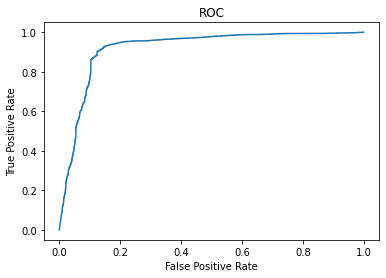

In [ ]:
### 2. Building and Evaluating the Model

# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


# note that alpha=1 is used by default for smoothing
mnb

### Model Evaluation

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

specificity = TN / float(TN + FP)
print("specificity",specificity)

precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

y_pred_class

y_pred_proba

# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

# area under the curve
print (roc_auc)

# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)